In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data prep

In [47]:
auto_mpg = pd.read_csv("auto-mpg.csv", header = 0)
auto_mpg.head(20)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [4]:
auto_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [11]:
checknan = auto_mpg.isnull().values.any()
print(f"Check if there are NaN values: {checknan}")
if checknan == False:
    print("Dataset has no missing values")
else:
    print("There are missing values")

Check if there are NaN values: False
Dataset has no missing values


## EDA

Exploring values for MPG ( miles per gallon)

In [14]:
auto_mpg["mpg"].describe()

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

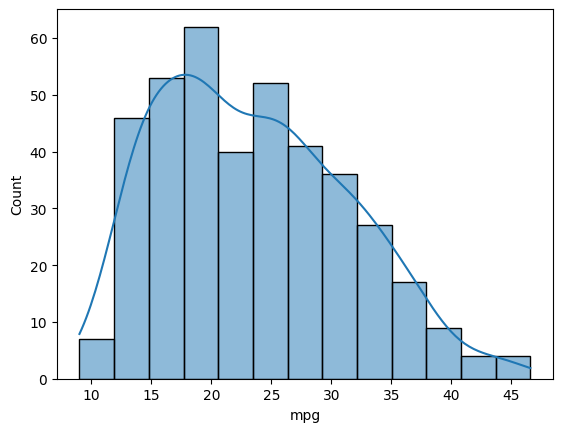

In [18]:
sns.histplot(auto_mpg["mpg"], kde=True);

MPG values look normally distributed, with a slight skew to the right. Lets double check using skew.

A skewness value greater than 1 or less than -1 indicates a highly skewed distribution. A value between 0.5 and 1 or -0.5 and -1 is moderately skewed. A value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.

In [25]:
skew_mpg = auto_mpg["mpg"].skew()
print("Skew for column MPG is", skew_mpg.round(2), "which puts it at fairly symmetrical")


Skew for column MPG is 0.46 which puts it at fairly symmetrical


In [24]:
auto_mpg["cylinders"].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

Most of the cylinders are 4, 8 and 6. With a majority being at 4 cylinders. 

From what little I know of cars

More cylinders = Less fuel efficient = Lower MPG.

So lets see if this hypothesis is true.

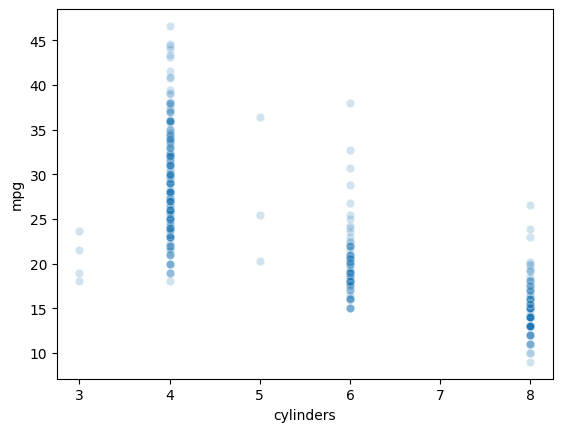

In [45]:

sns.scatterplot(x="cylinders", y="mpg", data=auto_mpg, alpha = 0.2);

Seems to be true. As cylinder increases, the range of MPG decreases.

Horsepower, weight and other metrics seems also obvious to form a hypothesis around.

Lets check with a correlation matrix

I would expect cars in asia to have better mpg from personal experience of driving hondas and toyotas

describe_by_category(auto_mpg, "mpg", "origin")
        count       mean       std   min    25%   50%     75%   max
origin                                                             
1       245.0  20.033469  6.440384   9.0  15.00  18.5  24.000  39.0
2        68.0  27.602941  6.580182  16.2  23.75  26.0  30.125  44.3
3        79.0  30.450633  6.090048  18.0  25.70  31.6  34.050  46.6
My hypoethesis was corect; asian cars had the highest mpg but American cars had a far worse mpg compared to asian and european cars